In [1]:
#making a cooy of the csv file
import shutil
import pandas as pd
shutil.copy('game_details.csv', 'game_details_copy.csv')

#reading the csv file
game_details_copy_df = pd.read_csv('game_details_copy.csv')

#remove less than 1000 user rated games
game_details_copy_df = game_details_copy_df[game_details_copy_df['users_rated'] >= 1000]

#exporting to csv
game_details_copy_df.to_csv('game_details_copy.csv', index=False)







In [2]:
#how many unique values are there in the 'categories' column
unique_categories = game_details_copy_df['categories'].nunique()
print(unique_categories)

#how many unique values are there in the 'mechanics' column
unique_mechanics = game_details_copy_df['mechanics'].nunique()
print(unique_mechanics)

1589
2223


In [3]:
#printing all unique values in the 'categories' column
unique_categories = game_details_copy_df['categories'].unique()
print(unique_categories)


["['Economic', 'Negotiation']" "['Medieval', 'Territory Building']"
 "['Medical']" ... "['Dice', 'Fantasy', 'Fighting', 'Real-time']"
 "['Civil War', 'Medieval', 'Wargame']"
 "['Ancient', 'Civilization', 'Mythology']"]


In [5]:
import pandas as pd

#loading the data
df = pd.read_csv('game_details_copy.csv')

#splitting the categories into separate rows
df['categories'] = df['categories'].str.strip("[]").str.replace("'", "").str.split(',')

#explode the categories into separate rows
df = df.explode('categories')

#removing leading/trailing whitespace from categories
df['categories'] = df['categories'].str.strip()

#saving the new dataframe to a CSV file
df.to_csv('game_details_copy_expanded.csv', index=False)

Data has been successfully expanded and saved to 'game_details_copy_expanded.csv'


In [11]:
#count common values in the 'categories' column
common_categories = df['categories'].value_counts()
print(common_categories)

categories
['Card Game']                                                                        53
['Abstract Strategy']                                                                47
['Card Game', 'Fantasy']                                                             36
['Economic']                                                                         24
['Dice']                                                                             22
                                                                                     ..
['Abstract Strategy', 'Bluffing', 'Deduction', 'Memory', 'Napoleonic', 'Wargame']     1
['Arabian', 'Expansion for Base-game', 'Fantasy', 'Mythology']                        1
['Political', 'Renaissance']                                                          1
['Adventure', 'Travel']                                                               1
['Ancient', 'Civilization', 'Mythology']                                              1
Name: count, Length: 

In [7]:
#do the same for the 'mechanics' column
df['mechanics'] = df['mechanics'].str.strip("[]").str.replace("'", "").str.split(',')
df = df.explode('mechanics')
df['mechanics'] = df['mechanics'].str.strip()
df.to_csv('game_details_copy_expanded.csv', index=False)

common_mechanics = df['mechanics'].value_counts()
print(common_mechanics)

mechanics
Hand Management            3755
Variable Player Powers     3491
Dice Rolling               3401
Open Drafting              1849
Set Collection             1830
                           ... 
Crayon Rail System            6
Different Dice Movement       6
Auction: Dutch Priority       6
Auction: English              3
Auction: Dexterity            3
Name: count, Length: 195, dtype: int64


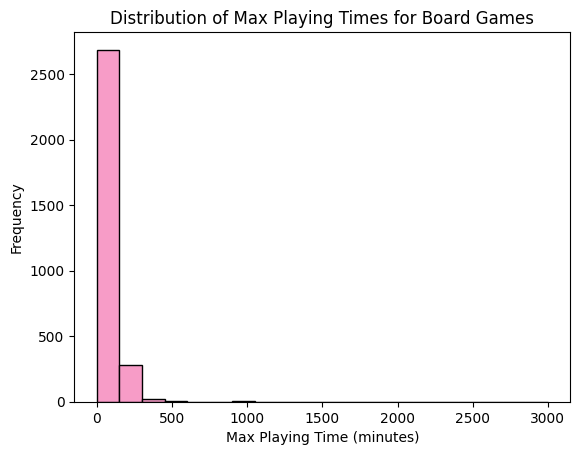

In [8]:
#creating a visualization for play times
import matplotlib.pyplot as plt

#loading the data
df = pd.read_csv('game_details_copy.csv')

#ploting a histogram of the playing time
plt.hist(df['max_playtime'], bins=20, color='#f79cc7', edgecolor='black')

#adding labels and title
plt.xlabel('Max Playing Time (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Max Playing Times for Board Games')

#display the plot
plt.show()


In [9]:
#printing the longest playing time
max_playtime = df['max_playtime'].max()
print(max_playtime)



3000


In [10]:
import shutil
import pandas as pd

#making a copy of the CSV file
shutil.copy('game_details.csv', 'game_details_copy.csv')

#reading the CSV file
game_details_copy_df = pd.read_csv('game_details_copy.csv')

#handling missing values
game_details_copy_df['categories'] = game_details_copy_df['categories'].fillna('')
game_details_copy_df['mechanics'] = game_details_copy_df['mechanics'].fillna('')

#counting unique values in the 'categories' column
unique_categories = game_details_copy_df['categories'].nunique()
print(f"Unique categories: {unique_categories}")

#counting unique values in the 'mechanics' column
unique_mechanics = game_details_copy_df['mechanics'].nunique()
print(f"Unique mechanics: {unique_mechanics}")

#counting the number of categories each game has
game_details_copy_df['category_count'] = game_details_copy_df['categories'].apply(lambda x: len(x.strip("[]").replace("'", "").split(',')))

#counting the number of mechanics each game has
game_details_copy_df['mechanic_count'] = game_details_copy_df['mechanics'].apply(lambda x: len(x.strip("[]").replace("'", "").split(',')))

#saving the updated dataframe to a new CSV file
game_details_copy_df.to_csv('game_details_with_counts.csv', index=False)


Unique categories: 1589
Unique mechanics: 2224
Data has been successfully saved to 'game_details_with_counts.csv'


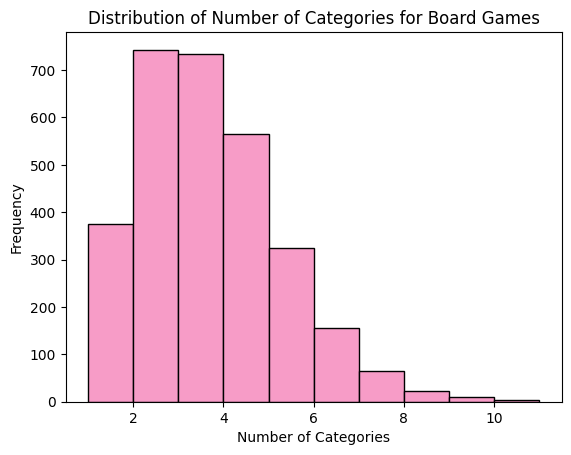

In [13]:
#creting a visualization for the number of categories
import matplotlib.pyplot as plt

#loading the data
df = pd.read_csv('game_details_with_counts.csv')

#plotting a histogram of the number of categories
plt.hist(df['category_count'], bins=range(1, 12), color='#f79cc7', edgecolor='black')

#adding labels and title
plt.xlabel('Number of Categories')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Categories for Board Games')
plt.savefig('category_count_histogram.png')

#display the plot
plt.show()



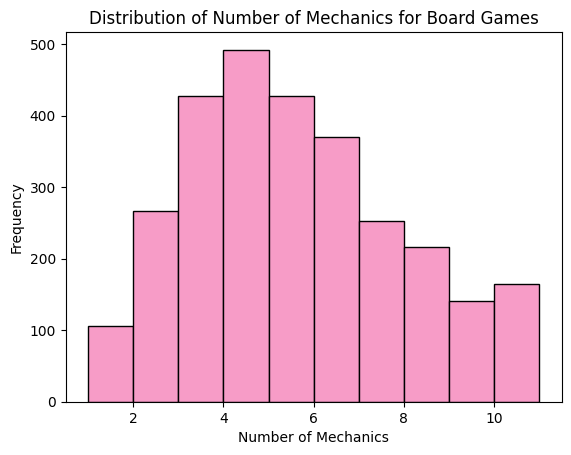

In [14]:
#do the same for the number of mechanics
import matplotlib.pyplot as plt

#loading the data
df = pd.read_csv('game_details_with_counts.csv')

#plotting a histogram of the number of mechanics
plt.hist(df['mechanic_count'], bins=range(1, 12), color='#f79cc7', edgecolor='black')

#adding labels and title
plt.xlabel('Number of Mechanics')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Mechanics for Board Games')
#saving the plot as a PNG file
plt.savefig('mechanic_count_histogram.png')
#display the plot
plt.show()


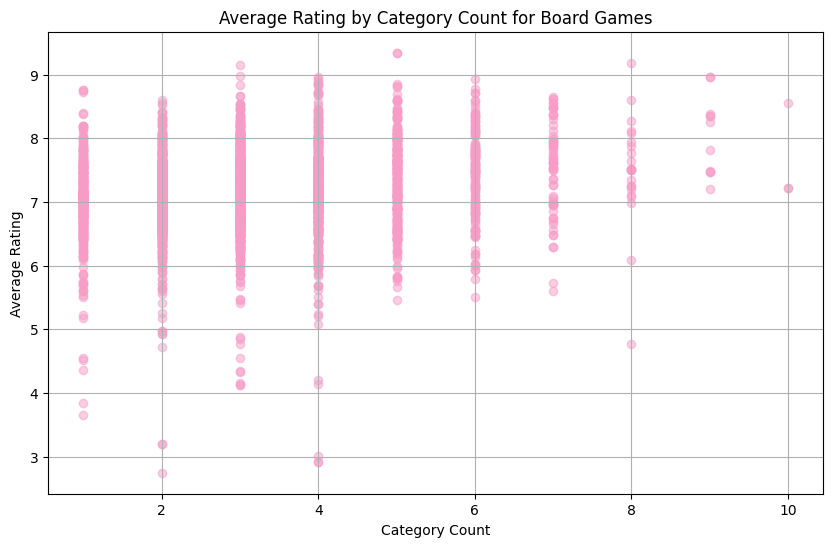

In [15]:
#creating a visualization for average ratings by caegory count

import matplotlib.pyplot as plt
import pandas as pd

#loading the data
df = pd.read_csv('game_details_with_counts.csv')

#plotting the average rating by category count
plt.figure(figsize=(10, 6))
plt.scatter(df['category_count'], df['average_rating'], alpha=0.5, color='#f79cc7')
plt.xlabel('Category Count')
plt.ylabel('Average Rating')
plt.title('Average Rating by Category Count for Board Games')
plt.grid(True)
#saving the plot as a PNG file
plt.savefig('average_rating_by_category_count.png')
plt.show()


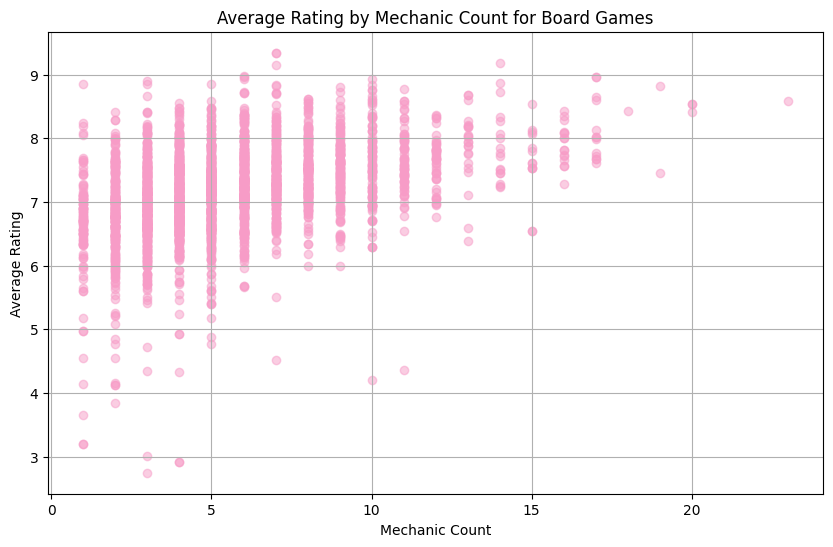

In [16]:
#creating a visualization for average ratings by mechanics count
import matplotlib.pyplot as plt
import pandas as pd

#loading the data
df = pd.read_csv('game_details_with_counts.csv')

#plotting the average rating by mechanic count
plt.figure(figsize=(10, 6))
plt.scatter(df['mechanic_count'], df['average_rating'], alpha=0.5, color='#f79cc7')
plt.xlabel('Mechanic Count')
plt.ylabel('Average Rating')
plt.title('Average Rating by Mechanic Count for Board Games')
plt.grid(True)
#save the plot as a png file
plt.savefig('average_rating_by_mechanic_count.png')
plt.show()


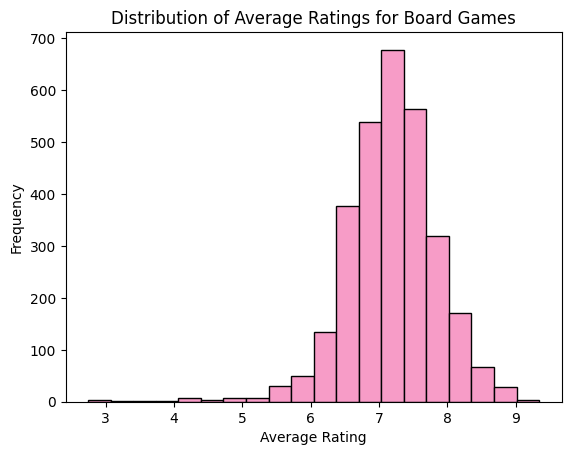

In [17]:
#creating a vizuaizaation for ratings
import matplotlib.pyplot as plt
import pandas as pd

#loading the data
df = pd.read_csv('game_details_copy.csv')

#plotting a histogram of the average ratings
plt.hist(df['average_rating'], bins=20, color='#f79cc7', edgecolor='black')

#adding labels and title
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Average Ratings for Board Games')
#save the plot as a PNG file
plt.savefig('average_rating_histogram.png')

#display the plot

plt.show()


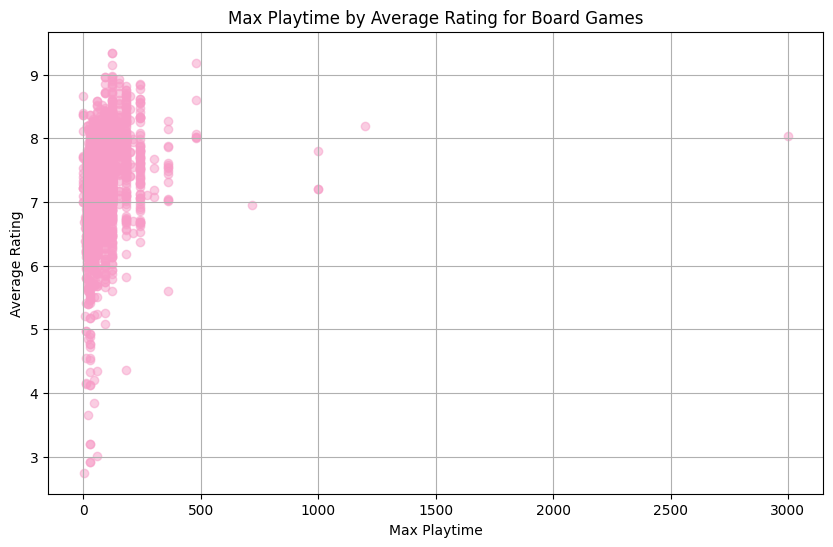

In [19]:
#creatng a visual for play time by average rating
import matplotlib.pyplot as plt
import pandas as pd

#loading the data
df = pd.read_csv('game_details_copy.csv')

#plotting the max playtime by average rating
plt.figure(figsize=(10, 6))
plt.scatter(df['max_playtime'], df['average_rating'], alpha=0.5, color='#f79cc7')
plt.xlabel('Max Playtime')
plt.ylabel('Average Rating')
plt.title('Max Playtime by Average Rating for Board Games')
plt.grid(True)
#save the plot as a PNG file
plt.savefig('max_playtime_by_average_rating.png')
plt.show()

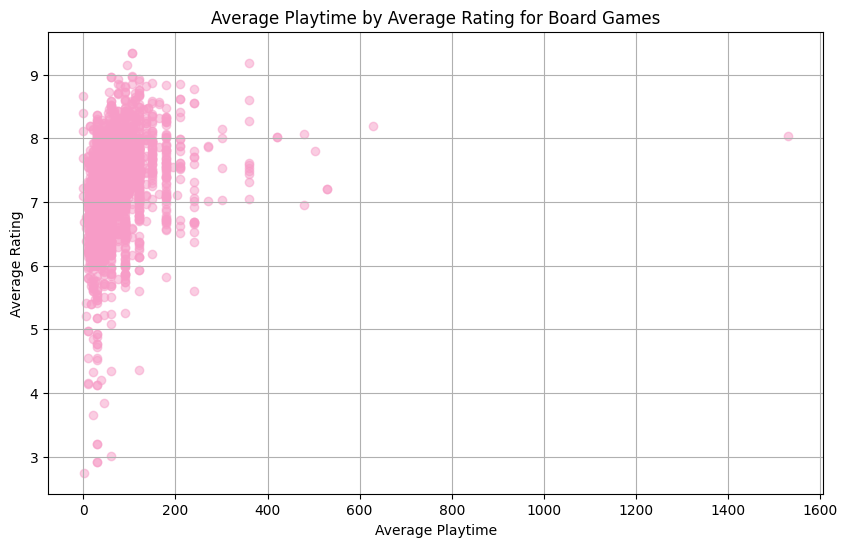

In [20]:
#adding a column called average_playtime to the dataframe
df['average_playtime'] = (df['min_playtime'] + df['max_playtime']) / 2
df.to_csv('game_details_copy.csv', index=False)

#plotting the average playtime by average rating
import matplotlib.pyplot as plt
import pandas

#loading the data
df = pd.read_csv('game_details_copy.csv')

#plotting the average playtime by average rating
plt.figure(figsize=(10, 6))
plt.scatter(df['average_playtime'], df['average_rating'], alpha=0.5, color='#f79cc7')
plt.xlabel('Average Playtime')
plt.ylabel('Average Rating')
plt.title('Average Playtime by Average Rating for Board Games')
plt.grid(True)
#save the plot as a PNG file
plt.savefig('average_playtime_by_average_rating.png')
plt.show()

In [16]:
#find the outliers for play time
import pandas as pd

#loading the data
df = pd.read_csv('game_details_copy.csv')

#calculating the first and third quartiles
q1 = df['max_playtime'].quantile(0.25)
q3 = df['max_playtime'].quantile(0.75)

#calculating the interquartile range
iqr = q3 - q1

#calculating the lower and upper bounds
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

#identifying outliers
outliers = df[(df['max_playtime'] < lower_bound) | (df['max_playtime'] > upper_bound)]

#display the outliers
print(outliers)

#export the outliers to a csv file
outliers.to_csv('outliers.csv', index=False)
print("Outliers have been saved to 'outliers.csv'")



                                                   name  year_published  \
67                                        Arkham Horror            2005   
72                                      Eldritch Horror            2013   
79                            Caverna: The Cave Farmers            2013   
81    A Game of Thrones: The Board Game (Second Edit...            2011   
87                               Mage Knight Board Game            2011   
...                                                 ...             ...   
2844                                         Rail Baron            1977   
2916     Unconditional Surrender! World War 2 in Europe            2014   
2918                                 Nations: Dynasties            2015   
2932                                    War of the Ring            1977   
2952  Food Chain Magnate: The Ketchup Mechanism & Ot...            2019   

      min_players  max_players  min_playtime  max_playtime  min_age  \
67              1           

In [17]:
#printing what data types are in the dataframe

print(df.dtypes)


name               object
year_published      int64
min_players         int64
max_players         int64
min_playtime        int64
max_playtime        int64
min_age             int64
categories         object
mechanics          object
users_rated         int64
average_rating    float64
weight            float64
dtype: object


In [19]:
#finding smallest value in year published column
import pandas as pd

#loading the data
df = pd.read_csv('game_details_copy.csv')

#finding the smallest value in the 'year_published' column
min_year_published = df['year_published'].min()
print(f"The smallest value in the 'year_published' column is: {min_year_published}")


The smallest value in the 'year_published' column is: -2200


Go is an abstract strategy board game for two players in which the aim is to fence off more territory than the opponent. The game was invented in China more than 2,500 years ago and is believed to be the oldest board game continuously played to the present day.


In [20]:
#what is the largest value for year published
import pandas as pd

#loading the data
df = pd.read_csv('game_details_copy.csv')

#finding the largest value in the 'year_published' column
max_year_published = df['year_published'].max()

print(f"The largest value in the 'year_published' column is: {max_year_published}")

The largest value in the 'year_published' column is: 2024


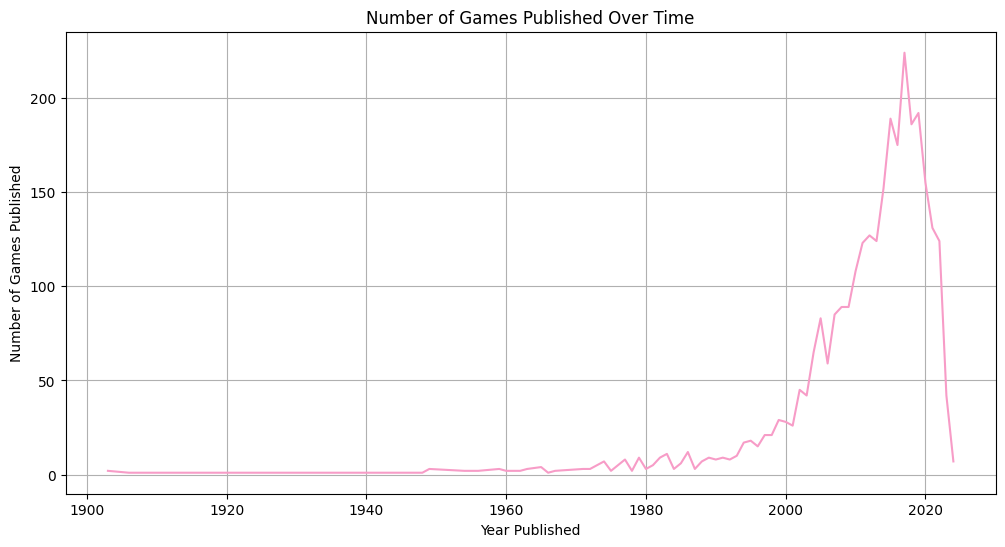

In [21]:
#creating a new df with only games published after 1900  
import pandas as pd
import matplotlib.pyplot as plt

#loading the data
df = pd.read_csv('game_details_copy.csv')

#filtering the data for games published after 1900
df_after1900 = df[df['year_published'] > 1900]

#counting the number of games published each year
games_per_year = df_after1900['year_published'].value_counts().sort_index()

#plotting the number of games published over time
plt.figure(figsize=(12, 6))
plt.plot(games_per_year.index, games_per_year.values, color='#f79cc7')
plt.xlabel('Year Published')
plt.ylabel('Number of Games Published')
plt.title('Number of Games Published Over Time')
plt.grid(True)

#save the plot as a PNG file
plt.savefig('games_published_over_time.png')

plt.show()



In [22]:
#what year had the most games published
import pandas as pd

#loading the data
df = pd.read_csv('game_details_copy.csv')

#finding the year with the most games published
year_most_games = df['year_published'].value_counts().idxmax()
print(f"The year with the most games published is: {year_most_games}")


The year with the most games published is: 2017


### counts wont be complete for games in 2024 because we are still in 2024


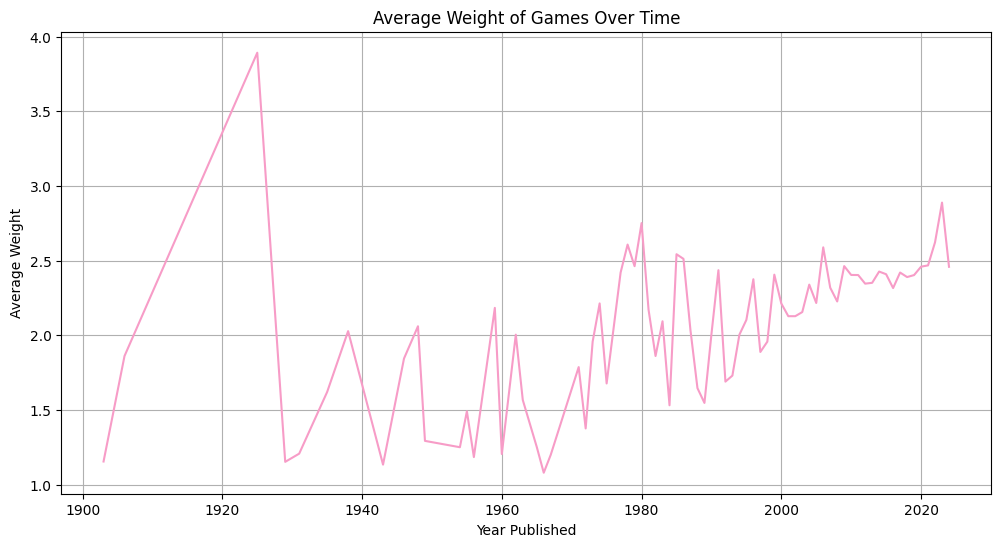

In [22]:
#line graph of difficulty rating over time (weight)
import pandas as pd
import matplotlib.pyplot as plt



#calculating the average weight by year
avg_weight_by_year = df_after1900.groupby('year_published')['weight'].mean()

#plotting the average weight over time
plt.figure(figsize=(12, 6))
plt.plot(avg_weight_by_year.index, avg_weight_by_year.values, color='#f79cc7')
plt.xlabel('Year Published')
plt.ylabel('Average Weight')
plt.title('Average Weight of Games Over Time')
plt.grid(True)





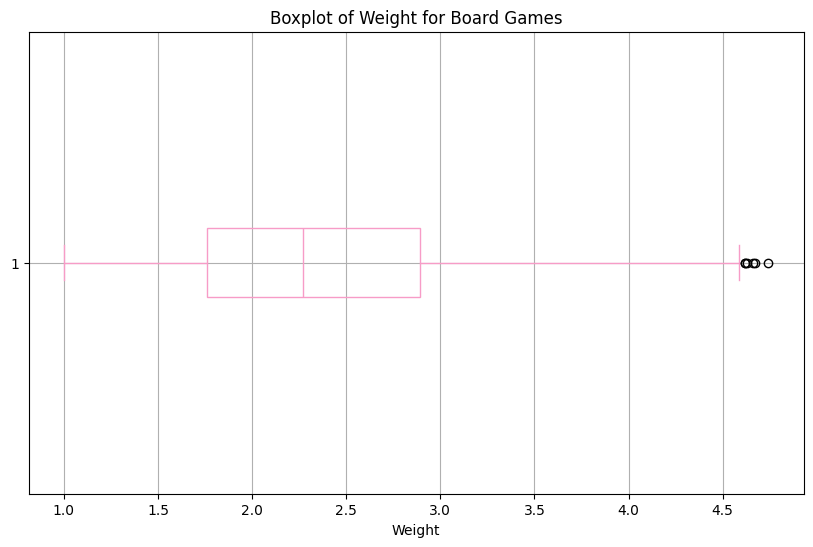

In [27]:
#creating a boxplot for weight
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

#loading the data
df = pd.read_csv('game_details_copy.csv')

#creating a boxplot of the weight of games
plt.figure(figsize=(10, 6))
box = plt.boxplot(df['weight'], vert=False, patch_artist=True,
                  boxprops=dict(facecolor='none', color='#f79cc7'),
                  whiskerprops=dict(color='#f79cc7'),
                  capprops=dict(color='#f79cc7'),
                  medianprops=dict(color='#f79cc7'))

plt.xlabel('Weight')
plt.title('Boxplot of Weight for Board Games')
plt.grid(True)

#save the plot as a PNG file
plt.savefig('weight_boxplot.png')
plt.show()

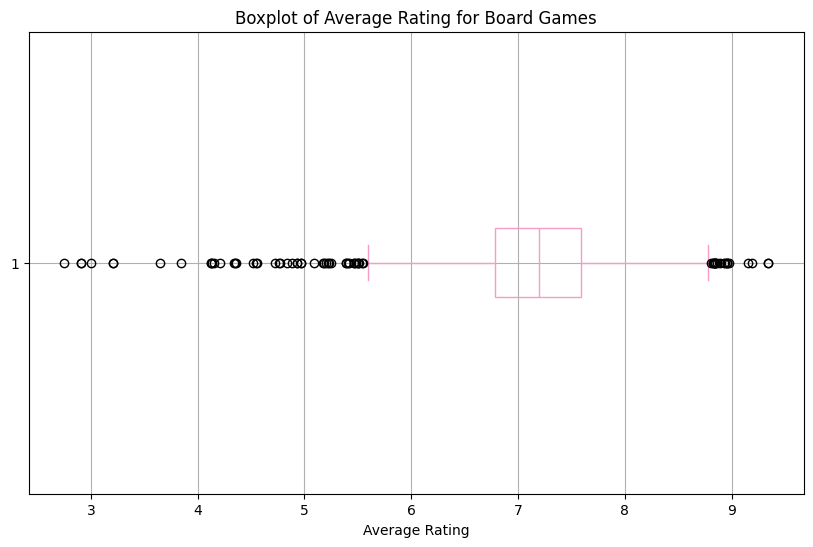

In [28]:
#do the same for ratings
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

#loading the data
df = pd.read_csv('game_details_copy.csv')

#creating a boxplot of the average rating of games
plt.figure(figsize=(10, 6))
box = plt.boxplot(df['average_rating'], vert=False, patch_artist=True,
                  boxprops=dict(facecolor='none', color='#f79cc7'),
                  whiskerprops=dict(color='#f79cc7'),
                  capprops=dict(color='#f79cc7'),
                  medianprops=dict(color='#f79cc7'))

plt.xlabel('Average Rating')
plt.title('Boxplot of Average Rating for Board Games')
plt.grid(True)

#save the plot as a PNG file
plt.savefig('average_rating_boxplot.png')

plt.show()

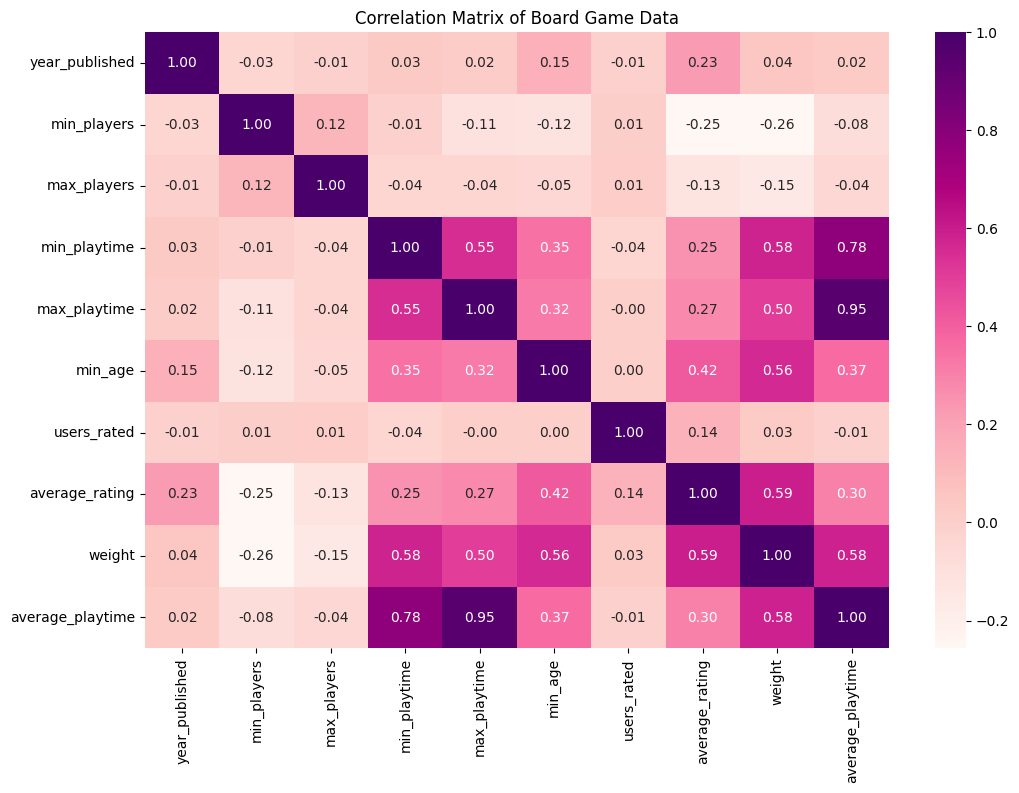

In [32]:
#corrplot for the dataframe
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#creating new df with only numeric columns
df = pd.read_csv('game_details_copy.csv')
df = df.select_dtypes(include='number')


#calculating the correlation matrix
corr = df.corr()

#creating a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='RdPu', fmt=".2f")
plt.title('Correlation Matrix of Board Game Data')

#save the plot as a PNG file with tight bounding box
plt.savefig('correlation_matrix.png', bbox_inches='tight')
plt.show()